In [4]:
import pandas as pd

data = pd.read_csv('housing.csv')

In [6]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# Fill missing values with the mean of each column

data.fillna(data.mean(numeric_only=True), inplace=True)

# Convert (Yes/No columns into 1/0)

data['mainroad'] = data['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
data['guestroom'] = data['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
data['basement'] = data['basement'].apply(lambda x: 1 if x == 'yes' else 0)
data['hotwaterheating'] = data['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
data['airconditioning'] = data['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
data['prefarea'] = data['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Convert 'furnishingstatus' to numerical
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})


In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [16]:
# Separate features (X) and target variable (y)
X = data.drop('price', axis=1)  # Features
y = data['price']               # Target

In [22]:
#split the data in the training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# train model 

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 1771751116594.0344
R-squared: 0.6494754192267804


In [44]:
house = {
    'area': 1200,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 1,
    'mainroad': 0,
    'guestroom': 1,
    'basement': 0,
    'hotwaterheating': 1,
    'airconditioning': 0,
    'parking': 0,
    'prefarea': 0,
    'furnishingstatus': 2
}

new_house_df = pd.DataFrame([house])

predicted_price = model.predict(new_house_df)

print("Predicted Price for the new house:", predicted_price[0])


Predicted Price for the new house: 5509002.604337161


In [48]:
house = {
    'area': 2500,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 1,
    'guestroom': 1,
    'basement': 1,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 1,
    'prefarea': 1,
    'furnishingstatus': 1
}

new_house_df = pd.DataFrame([house])

predicted_price = model.predict(new_house_df)

print("Predicted Price for the new house:", predicted_price[0])


Predicted Price for the new house: 7724743.468131999


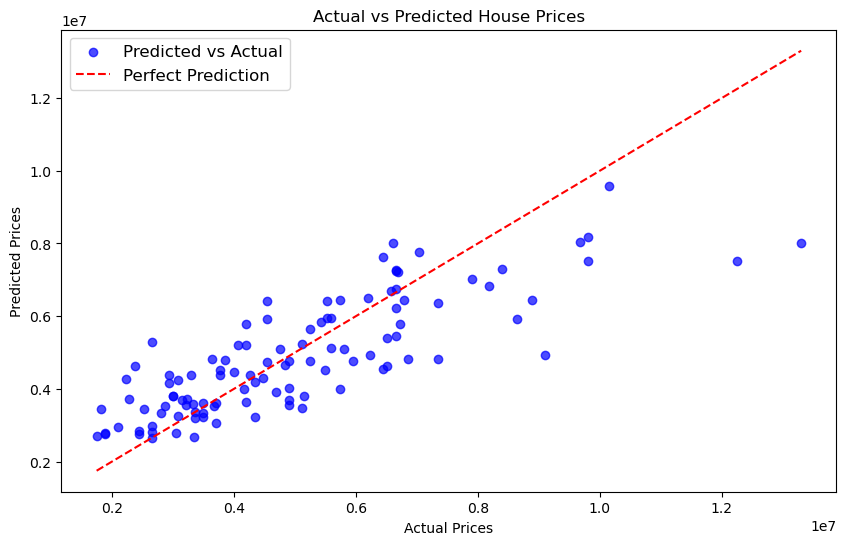

In [60]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted Prices

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Adding title and labels
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.legend(loc='best', fontsize=12)

plt.show()
